In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
plt.style.use('fivethirtyeight') # the fivethirtyeight is the name of a theme

# 1. Logistic Regression

## 1.1 Visualizing the data

In [2]:
data = pd.read_csv('ex2data1.txt', names = ['score1', 'score2', 'admission'])
data.head()

,score1,score2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


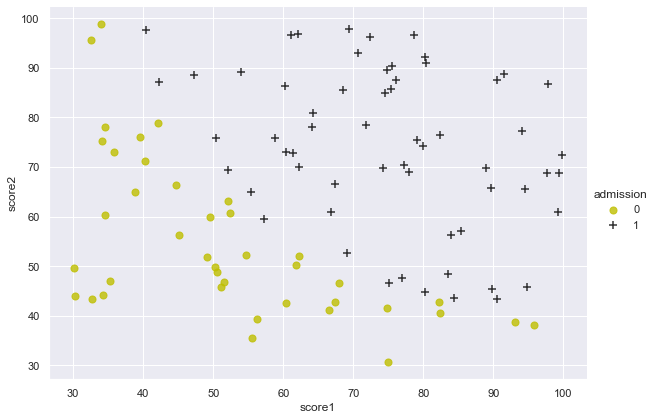

In [3]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))
sns.lmplot(x = 'score1', y = 'score2', hue='admission', data = data, height=6, aspect = 1.4,
           fit_reg=False, markers = ['o','+'], scatter_kws={"s": 50}, palette = ['y','k'])
plt.show()

## 1.2 Implementation
### 1.2.1 Warmup exercixe: sigmoid function
The logistic regression hypothesis:
$$ h_\theta(x) = g\left(\theta^Tx\right) $$
Where the sigmoid function is defined as:
$$ g(z) = \frac{1}{1+e^{-z}} $$

In [4]:
# Implement sigmoid function:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
# Implement logistic regression hypothesis:
def hypothesis(data):
    return sigmoid(data)

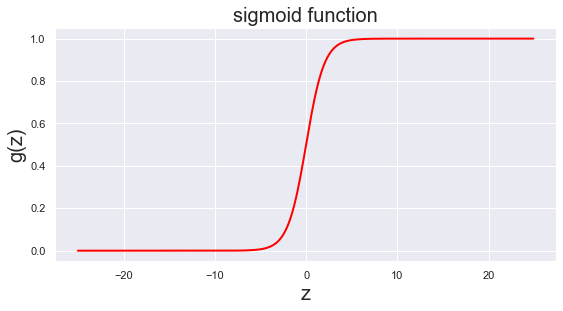

In [6]:
x = (np.arange(500) - 250)*0.1;
plt.figure(figsize = (8, 4))
plt.plot(x, hypothesis(x), 'r-', linewidth = 2)
plt.title('sigmoid function', fontsize = 20)
plt.xlabel('z', fontsize = 20)
plt.ylabel('g(z)', fontsize = 20)
plt.show()

### 1.2.2 Cost function and gradient

In [7]:
def get_X(data):
    ones = pd.DataFrame({'ones': np.ones(len(data))})
    temp_data = pd.concat([ones, data], axis = 1)
    return temp_data.iloc[:,:-1].values

In [8]:
def get_y(data):
    return data.iloc[:,-1].values

In [9]:
X = get_X(data)
y = get_y(data)
theta = np.zeros(X.shape[1])

In [10]:
# cost function
def cost(theta, X, y):
    z = theta@X.T
    hypo = hypothesis(z)
    inner = -y*np.log(hypo) - (1-y)*np.log(1-hypo)
    return inner.sum()/len(X)

In [11]:
cost(theta, X, y)

0.6931471805599453

In [12]:
# gradient function
def gradient(theta, X, y):
    z = theta@X.T
    hypo = hypothesis(z)
    return ((hypo - y)@X)/len(X)

In [13]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

### 1.2.3 Learning parameters using fminunc
参考链接：[scipy.potimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

具体实现参考黄海广的作业。

In [14]:
import scipy.optimize as opt

注意，函数“def cost(theta, X, y):”必须要按照“theta, X, y”的顺序写，如果写成“X, y, theta”，运行函数“opt.minimize()”的时候会报错。

“opt.minimize()”函数的参数，“cost”是代价函数，“theta”是待优化的参数，“X, y”是features和结果，method参数为使用方法，“gradient”是计算梯度的函数。

函数显示的结果如下图所示：
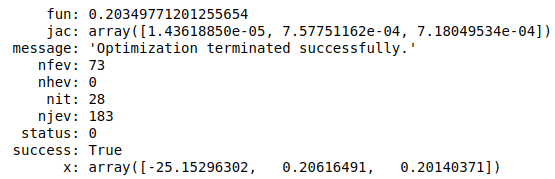
“fun: 0.20349771201255654”：为优化之后的cost。\
“x: array([-25.15296302,   0.20616491,   0.20140371])”：为优化之后的参数$\theta$

In [15]:
result = opt.minimize(fun = cost, x0 = theta, args = (X, y), method = 'Newton-CG', jac = gradient)
result

     fun: 0.20349771201255654
     jac: array([1.43618850e-05, 7.57751162e-04, 7.18049534e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 28
    njev: 183
  status: 0
 success: True
       x: array([-25.15296302,   0.20616491,   0.20140371])

### 1.2.4 Evaluating logistic regression

**预测学生是否会被录取**\
一名学生的成绩为（45，85），预测这名学生是否会被录取：

In [16]:
z = np.array([1, 45, 85])@result.x.T
sigmoid(z)

0.7762201575634593

**评估逻辑回归模型**

In [17]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [18]:
pred_y = predict(X, result.x)
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



**Visualization**

In [19]:
result.x

array([-25.15296302,   0.20616491,   0.20140371])

In [20]:
coef = result.x / -result.x[2] # 除以负的第三项，这样计算之后前两项就直接变成了"y = coef[1]*x + coef[0]"的形式
coef

array([124.88827919,  -1.02364007,  -1.        ])

In [21]:
x = np.arange(30, 100, step = 0.1)
y = coef[1]*x + coef[0]

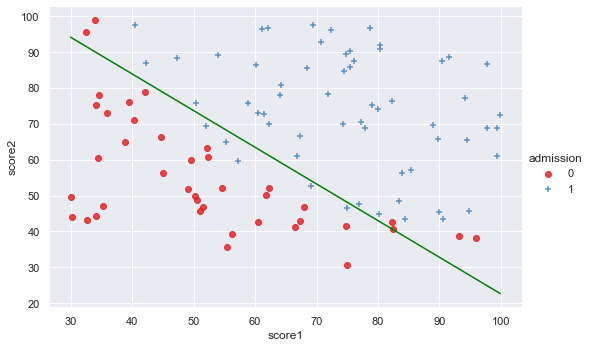

In [22]:
sns.set(context = 'notebook', style = 'darkgrid', palette = 'Set1')
sns.lmplot(x = 'score1', y = 'score2', hue = 'admission', data = data, fit_reg = False, 
           height = 5, aspect = 1.5, markers = ['o','+'])
plt.plot(x, y, 'green')
plt.show()

# 2. Regularized logistic regression

## 2.1 Visualizing the data

In [23]:
!head ex2data2.txt

0.051267,0.69956,1
-0.092742,0.68494,1
-0.21371,0.69225,1
-0.375,0.50219,1
-0.51325,0.46564,1
-0.52477,0.2098,1
-0.39804,0.034357,1
-0.30588,-0.19225,1
0.016705,-0.40424,1
0.13191,-0.51389,1


In [24]:
data2 = pd.read_csv('ex2data2.txt', names = ['test1', 'test2', 'accepted'])

In [25]:
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


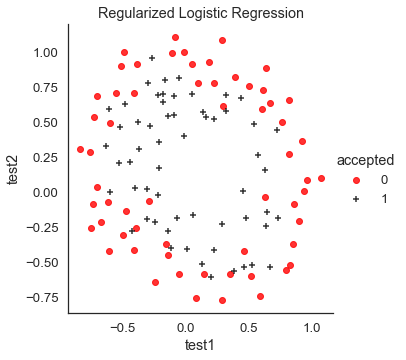

In [26]:
sns.set(context = 'notebook', style = 'white', palette = 'Set2', font_scale = 1.2)
sns.lmplot(x = 'test1', y = 'test2', hue = 'accepted', data = data2, 
          fit_reg = False, markers = ['o', '+'],
          palette = ['red', 'k'], height = 5, aspect = 1)
plt.title('Regularized Logistic Regression')
plt.show()

## 2.2 Feature mapping

**polynomial expansion**

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
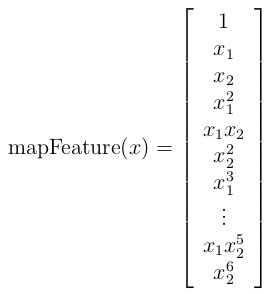

In [27]:
def feature_mapping(x, y, power, as_ndarray = False):
    poly_dict = {'f{}{}'.format(i,j):np.power(x, i)*np.power(y, j)
            for i in range(power + 1)
            for j in range(power + 1 - i)}
    poly_df = pd.DataFrame(poly_dict)
    if as_ndarray:
        return poly_df.values
    else:
        return poly_df

In [28]:
poly_data = feature_mapping(data2.test1, data2.test2, 6)
print(poly_data.shape)
poly_data.head()

(118, 28)


,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


## 2.3 Cost function and gradient

Cost function of regularized logistic regression:\
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m\left[-y^{(i)}log\left(h_\theta\left(x^{(i)}\right)\right) - \left(1 - y^{(i)}\right)log\left(1 - h_\theta\left(x^{(i)}\right)\right)\right] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2 $$

The gradient of the cost function:\
$$ \begin{align}\frac{\partial{J}(\theta)}{\partial{\theta}_j} = \frac{1}{m}\sum_{i = 1}^{m}\left(h_\theta\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}_j \qquad\qquad &\text{for}\; j = 0 \\ \frac{\partial{J}(\theta)}{\partial{\theta}_j} = \left(\frac{1}{m}\sum_{i = 1}^{m}\left(h_\theta\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}_j\right) + \frac{\lambda}{m}\theta_j \qquad &\text{for}\; j \ge 0\end{align} $$

### 2.3.1 regularized cost（正则化代价函数）

In [29]:
def regularizedCost(theta, X, y, lam = 1):
    theta_j1_to_n = theta[1:]
    regularized_term = (lam / (2*len(X))) * np.power(theta_j1_to_n, 2).sum()
    return cost(theta, X, y) + regularized_term

In [30]:
theta = np.zeros(poly_data.shape[1])
X = poly_data.values
y = data2.iloc[:,-1].values

In [31]:
regularizedCost(theta, X, y, lam = 1)

0.6931471805599454

### 2.3.2 regularized gradient（正则化梯度）

In [32]:
def regularizedGradient(theta, X, y, lam = 1):
    regularized_theta = lam * theta[1:]/len(X)
    regularized_term = np.concatenate([np.zeros(1), regularized_theta])
    return gradient(theta, X, y) + regularized_term    

In [33]:
regularizedGradient(theta, X, y)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

### 2.3.3 Learning parameters using fminunc（优化参数$\theta$）

In [34]:
import scipy.optimize as opt

In [35]:
print('init cost = {}'.format(regularizedCost(theta, X, y)))
result = opt.minimize(fun = regularizedCost, x0 = theta, args = (X, y), method = 'Newton-CG', jac = regularizedGradient)
result

init cost = 0.6931471805599454


     fun: 0.529002729712768
     jac: array([-1.47444558e-07, -4.76762777e-08,  1.59471185e-08,  2.08410689e-08,
        5.21873028e-08,  4.39562953e-08,  3.37583697e-08, -2.80284486e-08,
        9.93620236e-09,  1.14527867e-08,  4.92767971e-10,  2.54260224e-09,
       -2.41215287e-09, -2.16127135e-08, -4.47811541e-09,  8.84791441e-09,
       -2.02106405e-09, -1.19715617e-09, -2.54258127e-08, -7.99579794e-10,
        6.23815665e-09, -1.91805127e-10, -2.00243706e-08,  2.99159975e-10,
       -1.70406862e-09, -4.35770370e-09, -3.98259373e-10, -4.10371399e-09])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 57
  status: 0
 success: True
       x: array([ 1.27273889,  1.18108691, -1.43166407, -0.1751303 , -1.19281505,
       -0.45635659, -0.92465316,  0.62527139, -0.91742296, -0.35723852,
       -0.27470598, -0.29537772, -0.14388681, -2.01995903, -0.36553399,
       -0.61555415, -0.27778467, -0.32737991,  0.12400571, -0.05098912,
       -0.04

## 2.4 预测

In [36]:
final_theta = result.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



## 2.5 Plotting the decision boundary with different $\lambda$(a constant)
略